## Рубежный контроль №2. Серик Иван РТ5-61

## [Задание](https://github.com/ugapanyuk/courses_current/wiki/TMO_RK_2)
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.
### Методы 1 и 2: Дерево решений, Градиентный бустинг

## [О датасете](https://www.kaggle.com/datasets/mathan/fifa-2018-match-statistics)
#### Context
I thought of consolidating and sharing this public data to see how the data science world uses it discover interesting patterns. The data has been collected from 2018 FIFA World Cup Russia Official App.
#### Content
The data will be updated after each match daily.
Note: On the column '1st Goal', any goal that was scored in the extra time will be denoted as 45 or 90 based on 1st or 2nd half of the game (ex. if 1st goal was scored in 45+2 mins then it will be mentioned as 45 instead of 47, likewise for the 2nd half)
#### Acknowledgements
Thanks to the FIFA 2018 World Cup App.
#### Inspiration
I thought of consolidating and sharing this public data to see how the data science world uses it discover interesting patterns. Can we predict the Man of the match award using this statistics before the official announcement that will be made right after the match?

#### 1. Импорт библиотек

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#### 2. Загрузка данных и первичный осмотр

In [33]:
df = pd.read_csv('fifa2018stats.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())


         Date          Team      Opponent  Goal Scored  Ball Possession %  \
0  14-06-2018        Russia  Saudi Arabia            5                 40   
1  14-06-2018  Saudi Arabia        Russia            0                 60   
2  15-06-2018         Egypt       Uruguay            0                 43   
3  15-06-2018       Uruguay         Egypt            1                 57   
4  15-06-2018       Morocco          Iran            0                 64   

   Attempts  On-Target  Off-Target  Blocked  Corners  ...  Yellow Card  \
0        13          7           3        3        6  ...            0   
1         6          0           3        3        2  ...            0   
2         8          3           3        2        0  ...            2   
3        14          4           6        4        5  ...            0   
4        13          3           6        4        5  ...            1   

   Yellow & Red  Red  Man of the Match  1st Goal        Round  PSO  \
0             0    0  

#### 3. Выбор целевой переменной и признаков. Предобработка данных

Целевая переменная: 'Man of the Match'

Признаки: числовые статистики матча (например: Shots on Goal, Ball Possession %, Pass Accuracy % и т.д.)


In [34]:
numeric_features = [
    'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
    'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks',
    'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
    'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
    'Goals in PSO',
]

# Категориальные признаки
categorical_features = ['Round', 'PSO']

# Кодируем категориальные признаки get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Формируем X и y
X = df_encoded.drop(columns=['Man of the Match', 'Date', 'Team', 'Opponent'])
y = df_encoded['Man of the Match']

# Кодируем целевую переменную LabelEncoder()
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Удаляем или заменяем пропуски в признаках
X = X.fillna(0)

#### 4. Разделение на тренировочную и тестовую выборки

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### 5. Обучение моделей и оценка качества
##### Используем accuracy_score и f1_score из sklean
- Accuracy используется как базовая метрика, показывающая общую долю верных предсказаний.
- F1 Score применяется для более корректной оценки качества модели в условиях возможного дисбаланса классов.
##### Кроме двух основных метрик, выводится classification report, который включает:
- Precision — насколько точно модель определяет конкретный класс.
- Recall — способность модели находить все экземпляры класса.
- Support — количество образцов для каждого класса.

In [36]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name}")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


Decision Tree
Accuracy: 0.6923
F1 Score: 0.7143
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.77      0.67      0.71        15

    accuracy                           0.69        26
   macro avg       0.69      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26


Gradient Boosting
Accuracy: 0.6538
F1 Score: 0.7097
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.69      0.73      0.71        15

    accuracy                           0.65        26
   macro avg       0.64      0.64      0.64        26
weighted avg       0.65      0.65      0.65        26



#### 5. Визуализация дерева решений и 10 самых важных признаков

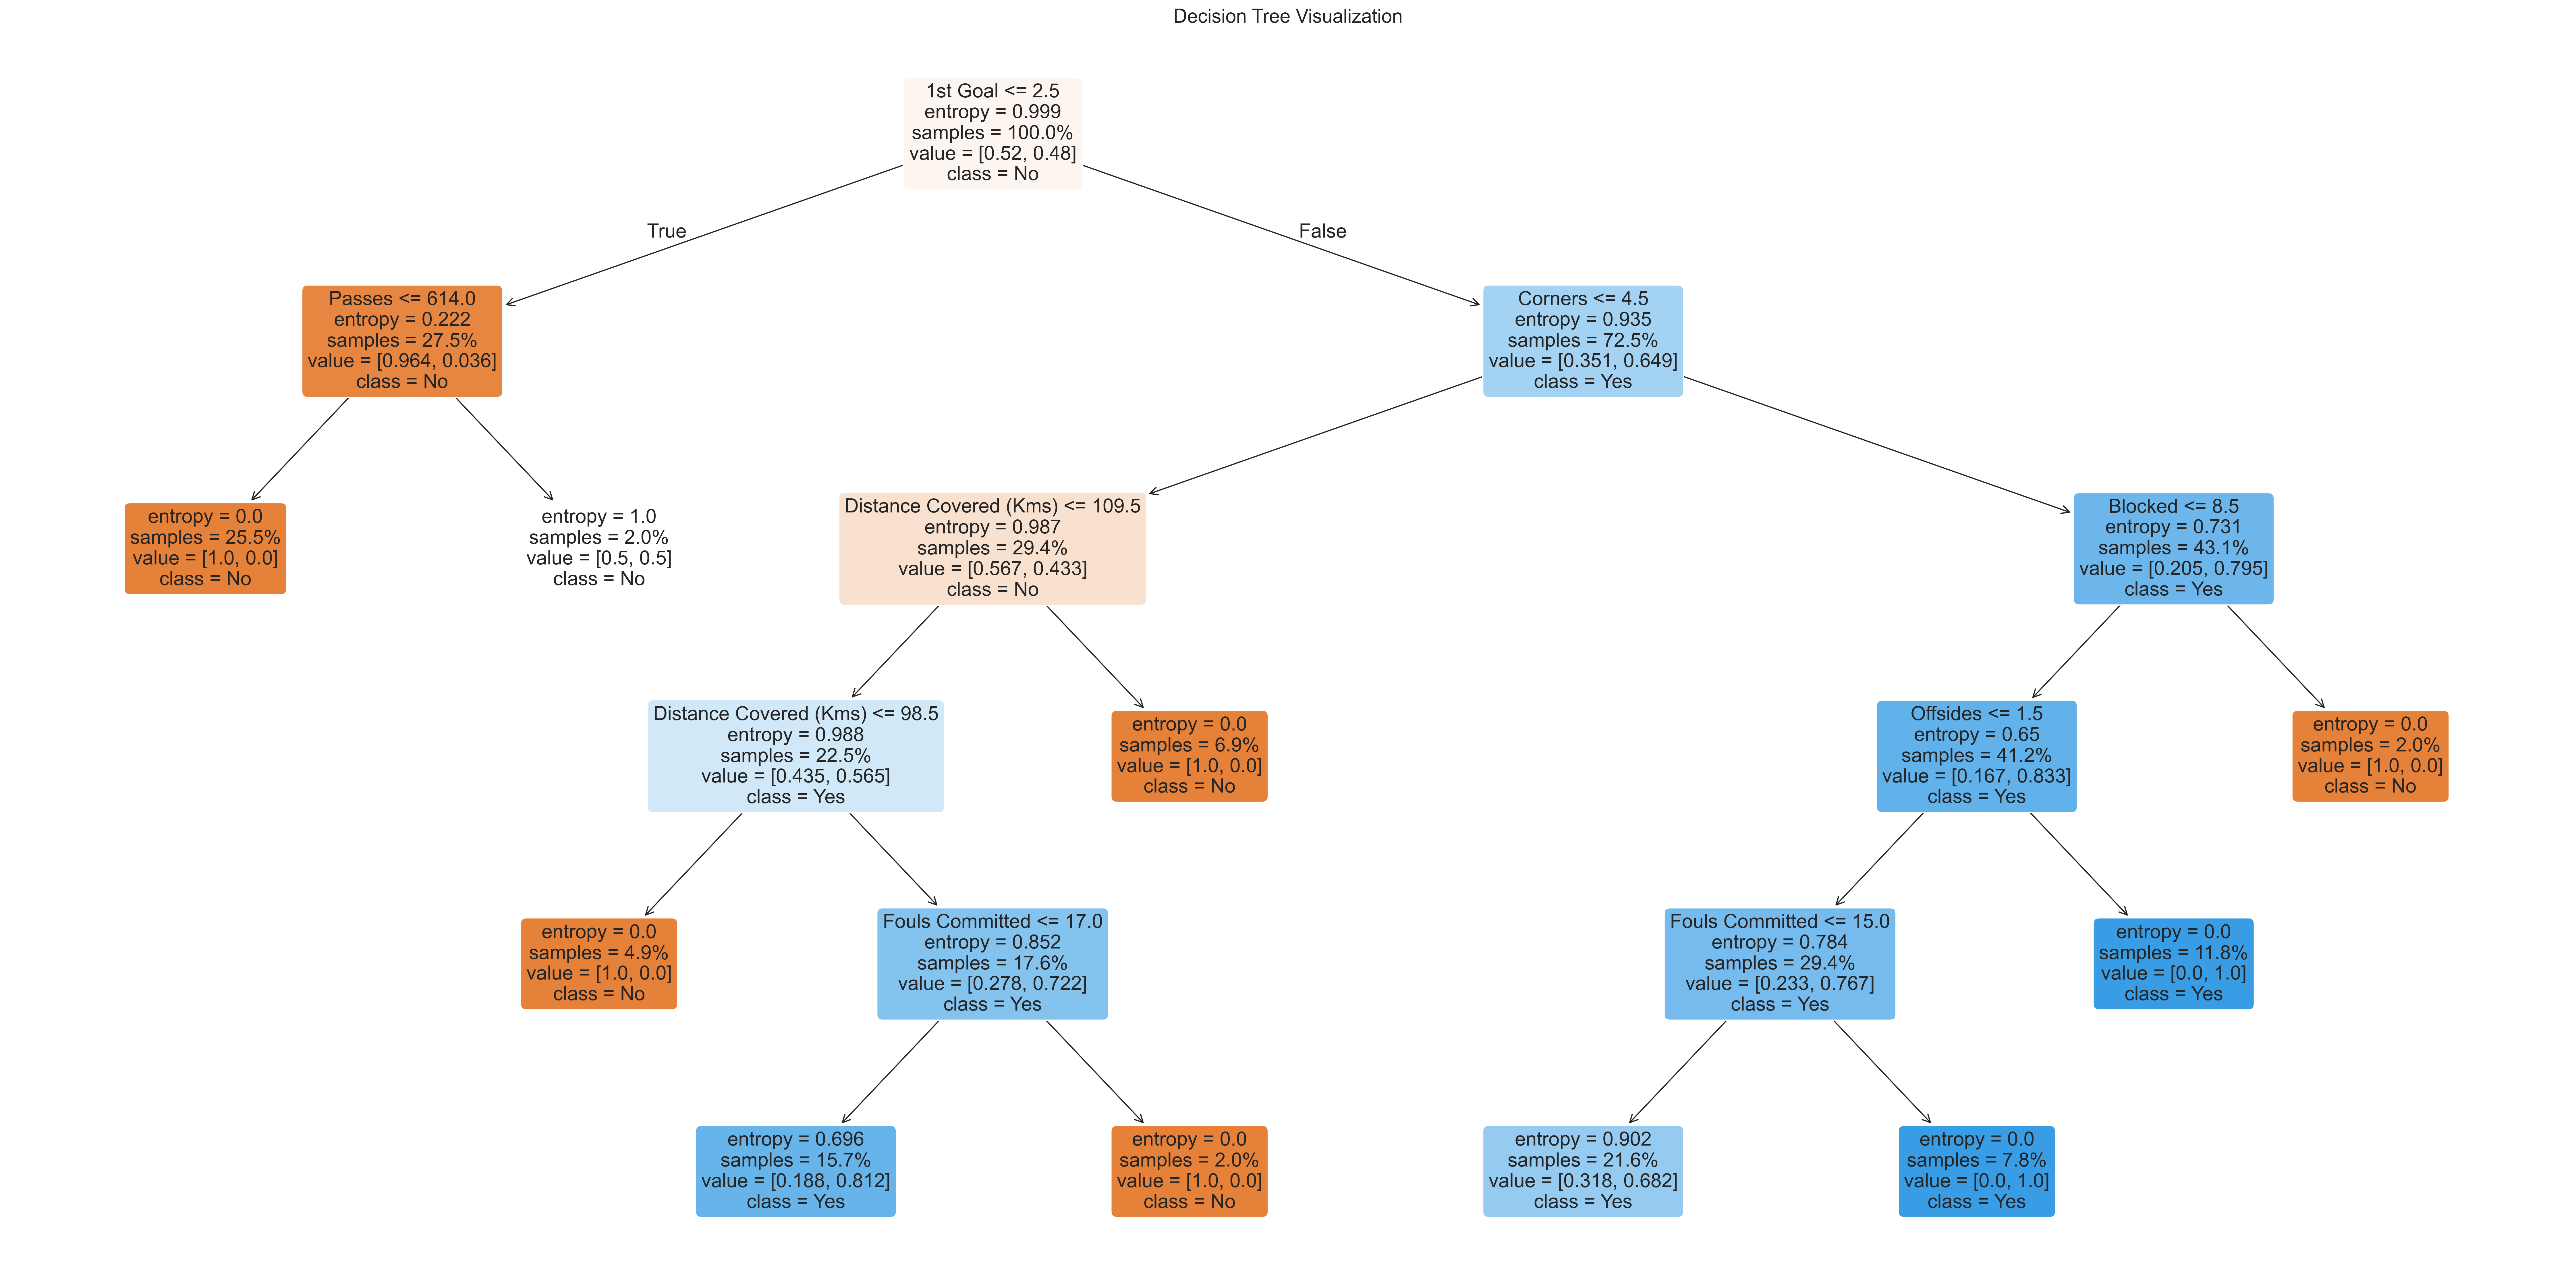

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15), dpi=300)
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          proportion=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()

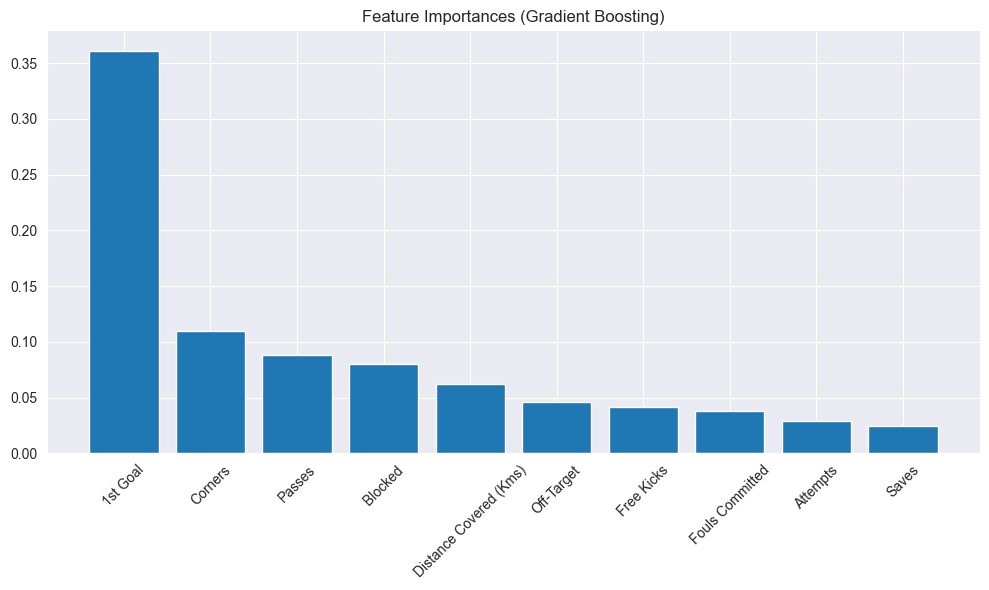

In [38]:
import numpy as np

importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Топ-10 признаков
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()

### Результат
Хотя обе модели показывают сопоставимое качество, Decision Tree демонстрирует немного более высокий F1 Score и Accuracy. Низкая точность в среднем (около 70%) может говорить о субъективности назначения Man of the Match при схожих показателях результативности игрока.
